In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [5]:
Dataset=pd.read_excel(r"C:\Users\Ashwani Pandey\Downloads\Superstore_USA.xlsx")

In [7]:
Dataset.head(5)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523


In [9]:
Dataset.shape

(9426, 24)

In [15]:
 Dataset.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

In [13]:
Dataset['Product Base Margin'].fillna(Dataset['Product Base Margin'].mean(),inplace=True)

C:\Users\Ashwani Pandey\AppData\Local\Temp\ipykernel_8560\3254807474.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Dataset['Product Base Margin'].fillna(Dataset['Product Base Margin'].mean(),inplace=True)


In [14]:
Dataset.fillna({'Product Base Margin': Dataset['Product Base Margin'].mean()}, inplace=True)


#  Order Date Order Wise Priority

In [33]:
Dataset['Order Priority'].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1805
Name: count, dtype: int64

In [26]:
Dataset['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical', 'Critical '],
      dtype=object)

In [31]:
Dataset['Order Priority']=Dataset['Order Priority'].replace("Critical ","Critical")

In [32]:
Dataset['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical'], dtype=object)

In [34]:
#We have analyse till now univariate explory data analysis where with the help of graphs we can see the dataset

# Now go to another columns 

#now shipping mode

#Ship Mode

In [52]:
Dataset['Ship Mode'].value_counts()

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

In [53]:
Dataset['Ship Mode'].value_counts().index

Index(['Regular Air', 'Delivery Truck', 'Express Air'], dtype='object', name='Ship Mode')

In [60]:
x=Dataset['Ship Mode'].value_counts().index
y=Dataset['Ship Mode'].value_counts().values

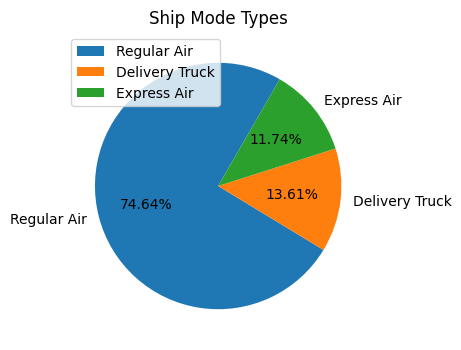

In [74]:
plt.figure(figsize=(5,4))
plt.pie(y,labels=x,startangle=60,autopct="%0.2f%%")
plt.legend(loc=2)
plt.title("Ship Mode Types")
plt.savefig("Ship Mode Types")
plt.show()

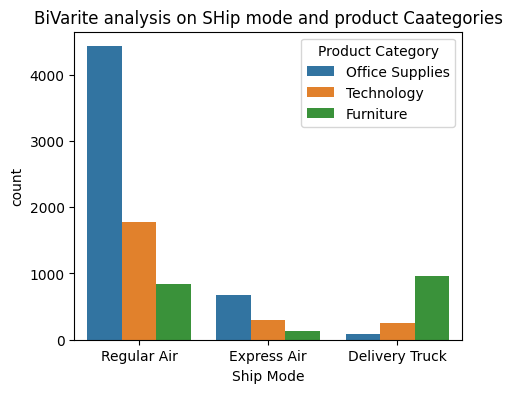

In [81]:
plt.figure(figsize=(5,4))
sns.countplot(x='Ship Mode',data=Dataset,hue='Product Category')
plt.title("BiVarite analysis on SHip mode and product Caategories")
plt.savefig("BiVarite analysis on SHip mode and product Caategories")
plt.show()

# Customer Segmement

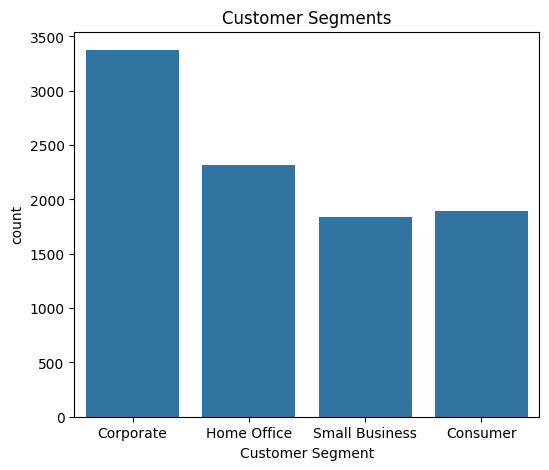

In [87]:
plt.figure(figsize=(6,5))

sns.countplot(x='Customer Segment',data=Dataset)
plt.title("Customer Segments")
plt.show()

In [88]:
#product Categories and Sub categories

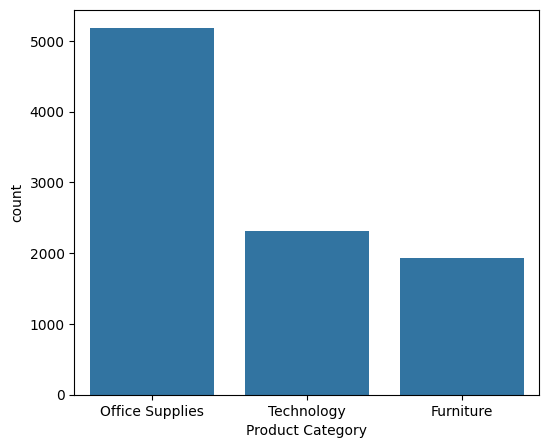

In [89]:
plt.figure(figsize=(6,5))

sns.countplot(x='Product Category',data=Dataset)

plt.show()

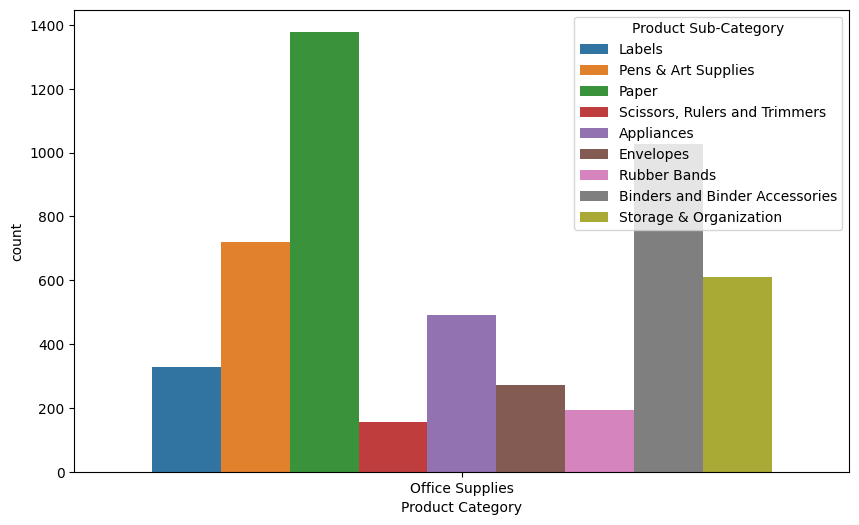

In [112]:
plt.figure(figsize=(10,6))

sns.countplot(x='Product Category',data=Dataset[Dataset['Product Category']=='Office Supplies'],hue='Product Sub-Category')

plt.show()

#Now to will work on date in EDA

In [114]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [117]:
Dataset['Order Year']=Dataset['Order Date'].dt.year

In [119]:
Dataset['Order Year'].value_counts()

Order Year
2013    3054
2012    2241
2011    2179
2010    1952
Name: count, dtype: int64

<Axes: xlabel='Order Year', ylabel='count'>

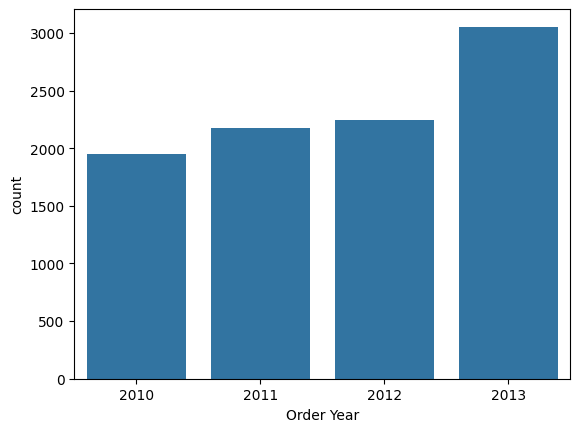

In [120]:
sns.countplot(x='Order Year',data=Dataset)

In [121]:
# State Wise SAles


In [128]:
Dataset['State or Province'].value_counts()[:5]

State or Province
California    1021
Texas          646
Illinois       584
New York       574
Florida        522
Name: count, dtype: int64

In [132]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

#Profit and Margin

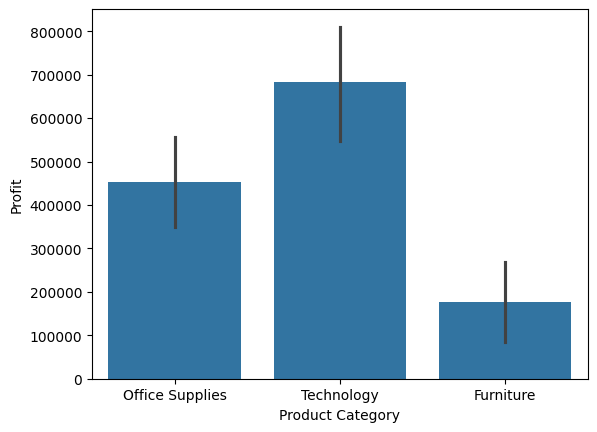

In [134]:
sns.barplot(x='Product Category',y='Profit',data=Dataset,estimator='sum')
plt.show()

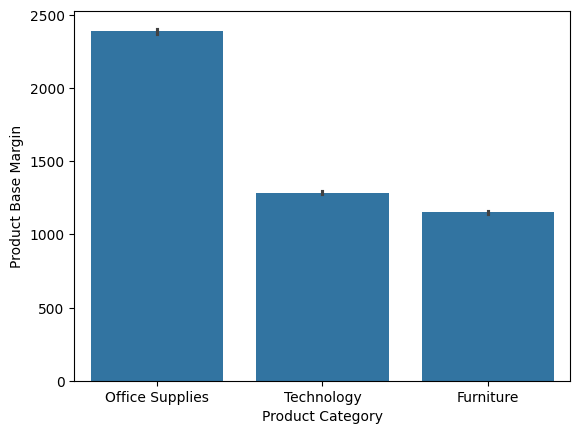

In [135]:
sns.barplot(x='Product Category',y='Product Base Margin',data=Dataset,estimator='sum')
plt.show()